In [1]:
import tensorflow as tf
import numpy      as np
import pandas     as pd
import seaborn    as sns

import matplotlib.pyplot as plt

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

from   sklearn.model_selection import train_test_split , KFold, StratifiedKFold, cross_val_score, cross_validate, GridSearchCV

from   sklearn.metrics         import accuracy_score , precision_score , recall_score , f1_score , confusion_matrix , precision_recall_curve, roc_curve, roc_auc_score

from   sklearn.metrics         import mean_squared_error, mean_absolute_error, r2_score

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA, IncrementalPCA

from   sklearn.preprocessing   import LabelEncoder , OneHotEncoder , MinMaxScaler , StandardScaler , Binarizer, PolynomialFeatures, RobustScaler

from   sklearn.linear_model    import LogisticRegression , LinearRegression    

from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import KFold
from   sklearn.svm             import SVC, SVR, LinearSVR
from   lightgbm                import LGBMRegressor
# from sklearn. import LinearRegression


In [2]:
def regression_model_predict(model, X_train, X_test, y_train, y_test, isFlag = False ) :
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if isFlag :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print(model.__class__.__name__, '-->')
    
    regression_eval(y_test, pred)

def regression_eval(y_test, y_pred) :
    print('회귀 평가 지표 확인 - ')
    print('MAE   - ' , mean_absolute_error(y_test, y_pred))
    print('MSE   - ' , mean_squared_error(y_test, y_pred))
    print('RMSE  - ' , np.sqrt(mean_squared_error(y_test, y_pred)))
    print('R2 SCORE - ', r2_score(y_test, y_pred))
    
    # rmsle 언더플로우 영향으로 로그변환이 필요함
    log_y    = np.log1p(y_test)
    log_pred = np.log1p(y_pred)
    error    = (log_y - log_pred) ** 2
    print('RMSLE - ' ,  np.sqrt(np.mean(error)))
    print()

In [63]:
result_frm = pd.DataFrame({'Category':['Model_NM','Model_NM_2','Params', 'MAE','MSE','RMSE','R2_SCORE','RMSLE']})


def regression_predict_eval_frm(model, X_train, X_test, y_train, y_test, isFlag = False) :
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    if isFlag :
        y_test = np.expm1(y_test)
        y_pred = np.expm1(y_pred)
    print(model.__class__.__name__, '-->')
    
    print('회귀 평가 지표 확인 - ')
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2score = r2_score(y_test, y_pred)
    print('MAE      - ' , mae)
    print('MSE      - ' , mse)
    print('RMSE     - ' , rmse)
    print('R2 SCORE - ', r2score)
    
    # rmsle 언더플로우 영향으로 로그변환이 필요함
    log_y    = np.log1p(y_test)
    log_pred = np.log1p(y_pred)
    error    = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(error))
    print('RMSLE - ' , rmsle)
    print()
    msg = list(X_data.columns)
#     msg = input('any message?')
    # dataframe 에 결과값 추가
    result_frm[result_frm.shape[1]] = [model.__class__.__name__, msg, model.get_params(), 
                                      mae, mse, rmse, r2score, rmsle]
    display(result_frm)

In [46]:
hospital_female = pd.read_csv('./hospital_female_0802_test3.csv', encoding='cp949')
hospital_female = hospital_female[hospital_female['yyyy'].astype(str).str.contains('2012|2013|2014|2015')].reset_index(drop=True)#2016년 전만 추출


In [47]:
hospital_female

,area,tma,yyyy,mm,dd,weekday,sum_gsr,sum_rn,avg_ps,max_ps,...,diff_hum,min_temp,max_temp,avg_temp,diff_temp,pm10_3b,pm10_7b,pm10_31b,frequency,fat_rate
0,강원,2012-01-01,2012,1,1,6,0.000000,0.173611,1023.886667,1026.533333,...,65.0,-7.3,5.0,-2.344048,12.3,87.662500,30.158333,15.678261,3.0,26.7
1,경기,2012-01-01,2012,1,1,6,0.000000,0.037736,1024.875000,1027.225000,...,27.0,-6.9,1.0,-3.010000,7.9,106.851851,28.537404,13.474891,5.0,24.6
2,경남,2012-01-01,2012,1,1,6,0.000000,0.065789,1022.950000,1024.900000,...,47.0,-2.9,7.0,1.642857,9.9,72.989269,26.719907,16.193461,1.0,22.5
3,경북,2012-01-01,2012,1,1,6,0.000702,0.721053,1023.268000,1025.488000,...,70.0,-5.9,6.1,0.075556,12.0,88.189236,25.336806,12.743785,1.0,23.7
4,광주,2012-01-01,2012,1,1,6,0.000000,0.700000,1025.250000,1027.250000,...,15.0,-0.9,3.0,0.383333,3.9,62.750000,18.958333,8.566667,2.0,22.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24832,전남,2015-12-31,2015,12,31,3,0.000000,1.608108,1031.053846,1034.280769,...,65.0,-2.3,10.0,4.105198,12.3,23.382672,46.708333,48.514658,3.0,25.4
24833,전북,2015-12-31,2015,12,31,3,1.305806,0.967742,1031.300000,1034.478571,...,50.0,-3.0,7.0,2.132162,10.0,36.292835,72.548882,56.803399,0.0,25.7
24834,제주,2015-12-31,2015,12,31,3,0.000000,0.971429,1030.792308,1034.553846,...,33.0,5.4,10.3,7.709797,4.9,27.340580,56.156250,48.416667,0.0,28.5
24835,충남,2015-12-31,2015,12,31,3,1.757273,0.196970,1031.513333,1034.120000,...,55.0,-3.0,6.0,1.345383,9.0,28.104167,79.543252,45.036458,0.0,26.4


In [48]:
# hospital2 = hospital.drop(['date', 'precipitation duration(hr)', 'female population', 'male population', 'total population'], axis=1)


In [49]:
hospital_female.columns

Index(['area', 'tma', 'yyyy', 'mm', 'dd', 'weekday', 'sum_gsr', 'sum_rn',
       'avg_ps', 'max_ps', 'min_ps', 'so2', 'o3', 'pm10', 'sex', 'elderly_pop',
       'total_pop', 'elderly_ratio', 'avg_age', 'min_max_ps', 'D/R',
       'heat_wave', 'cold_wave', 'min_hum', 'max_hum', 'avg_hum', 'diff_hum',
       'min_temp', 'max_temp', 'avg_temp', 'diff_temp', 'pm10_3b', 'pm10_7b',
       'pm10_31b', 'frequency', 'fat_rate'],
      dtype='object')

In [65]:
hospital_female2 = hospital_female[[
    'area', 'mm', 'weekday', 'sum_rn',
       'avg_ps', 'o3',
       'total_pop', 'elderly_ratio', 'avg_age', 'min_max_ps',
       'heat_wave', 'cold_wave', 'diff_hum',
        'diff_temp', 'pm10_7b', 'frequency']]

In [66]:
mapping = {'강원':0, '경기':1, '경남':2, '경북':3, '광주':4, '대구':5,
           '대전':6, '부산':7, '서울':8, '울산':9, '인천':10,
           '전남':11, '전북':12, '제주':13, '충남':14, '충북':15, '세종':16}

In [67]:
hospital_female2.insert(1, 'area_label', hospital_female2['area'].map(mapping))

In [68]:
hospital_female2.drop(columns=['area'], inplace=True)

/var/folders/f5/x0_185757lld2fhv6ygmb8f40000gn/T/ipykernel_40745/3562702183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospital_female2.drop(columns=['area'], inplace=True)


In [69]:
hospital_female2

,area_label,mm,weekday,sum_rn,avg_ps,o3,total_pop,elderly_ratio,avg_age,min_max_ps,heat_wave,cold_wave,diff_hum,diff_temp,pm10_7b,frequency
0,0,1,6,0.173611,1023.886667,0.027750,762617,18.053361,42.4,6.340000,0,0,65.0,12.3,30.158333,3.0
1,1,1,6,0.037736,1024.875000,0.023165,5928150,10.649039,37.7,5.500000,0,0,27.0,7.9,28.537404,5.0
2,2,1,6,0.065789,1022.950000,0.027277,1644251,15.076105,40.5,5.200000,0,0,47.0,9.9,26.719907,1.0
3,3,1,6,0.721053,1023.268000,0.027274,1342455,19.248690,43.2,5.688000,0,0,70.0,12.0,25.336806,1.0
4,4,1,6,0.700000,1025.250000,0.027300,738784,11.037868,37.6,4.100000,0,0,15.0,3.9,18.958333,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24832,11,12,3,1.608108,1031.053846,0.035985,955115,24.847060,45.9,6.892308,0,0,65.0,12.3,46.708333,3.0
24833,12,12,3,0.967742,1031.300000,0.028738,939456,21.104873,44.2,7.014286,0,0,50.0,10.0,72.548882,0.0
24834,13,12,3,0.971429,1030.792308,0.044719,310967,16.470236,41.5,7.523077,0,0,33.0,4.9,56.156250,0.0
24835,14,12,3,0.196970,1031.513333,0.024484,1023210,19.459055,43.1,6.800000,0,0,55.0,9.0,79.543252,0.0


In [70]:
X_data = hospital_female2.drop(['frequency'], axis=1)
y_data = hospital_female2[['frequency']]

print('X_data')
display(X_data.head())
print('y_data')
display(y_data.head())

X_data


,area_label,mm,weekday,sum_rn,avg_ps,o3,total_pop,elderly_ratio,avg_age,min_max_ps,heat_wave,cold_wave,diff_hum,diff_temp,pm10_7b
0,0,1,6,0.173611,1023.886667,0.027750,762617,18.053361,42.4,6.340,0,0,65.0,12.3,30.158333
1,1,1,6,0.037736,1024.875000,0.023165,5928150,10.649039,37.7,5.500,0,0,27.0,7.9,28.537404
2,2,1,6,0.065789,1022.950000,0.027277,1644251,15.076105,40.5,5.200,0,0,47.0,9.9,26.719907
3,3,1,6,0.721053,1023.268000,0.027274,1342455,19.248690,43.2,5.688,0,0,70.0,12.0,25.336806
4,4,1,6,0.700000,1025.250000,0.027300,738784,11.037868,37.6,4.100,0,0,15.0,3.9,18.958333


y_data


,frequency
0,3.0
1,5.0
2,1.0
3,1.0
4,2.0


In [71]:
# X_data scaling : normalization (MinMaxScaler) // y_data scaling : log
n_scaler = MinMaxScaler()
X_scaled = n_scaler.fit_transform(X_data)

# y_data scaling : log1p
y_scaled = np.log1p(y_data)

In [72]:
# lda = LinearDiscriminantAnalysis(n_components=5)
# pca = PCA(n_components='mle') # pca 이용해서 진행

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y_scaled['frequency'],
                                                   test_size = .2,
                                                    shuffle=True,
                                                   random_state = 1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19869, 15), (4968, 15), (19869,), (4968,))

In [74]:
# pca.fit(X_train)
# train_reduced = pca.fit_transform(X_train)
# test_reduced = pca.transform(X_test)

In [75]:
hospital_female2.isnull().sum()

area_label       0
mm               0
weekday          0
sum_rn           0
avg_ps           0
o3               0
total_pop        0
elderly_ratio    0
avg_age          0
min_max_ps       0
heat_wave        0
cold_wave        0
diff_hum         0
diff_temp        0
pm10_7b          0
frequency        0
dtype: int64

In [76]:
poly = PolynomialFeatures(degree=3, include_bias=False)

poly.fit(X_train)
train_poly = poly.transform(X_train)
test_poly  = poly.transform(X_test)

In [77]:
svr = SVR(kernel='rbf')
svr.fit(train_poly, y_train)

regression_predict_eval_frm(svr, train_poly, test_poly, y_train, y_test, isFlag=True)
result_frm.to_csv('./result_frm.csv', encoding='utf-8')

SVR -->
회귀 평가 지표 확인 - 
MAE      -  0.884763474788205
MSE      -  1.543849338047396
RMSE     -  1.2425173391335012
R2 SCORE -  0.4205640450588555
RMSLE -  0.4751079173613276



,Category,1,2
0,Model_NM,SVR,SVR
1,Model_NM_2,"[area_label, yyyy, mm, dd, weekday, sum_rn, av...","[area_label, mm, weekday, sum_rn, avg_ps, o3, ..."
2,Params,"{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...","{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd..."
3,MAE,0.886374,0.884763
4,MSE,1.539807,1.543849
5,RMSE,1.24089,1.242517
6,R2_SCORE,0.422081,0.420564
7,RMSLE,0.475954,0.475108


In [78]:
lgbm = LGBMRegressor()
lgbm.fit(train_poly, y_train)
regression_predict_eval_frm(lgbm, train_poly, test_poly, y_train, y_test, isFlag=True)
result_frm.to_csv('./result_frm.csv', encoding='utf-8')

LGBMRegressor -->
회귀 평가 지표 확인 - 
MAE      -  0.9019249806969999
MSE      -  1.6017190839589823
RMSE     -  1.265590409239491
R2 SCORE -  0.3988444311962158
RMSLE -  0.4735889182357715



,Category,1,2,3
0,Model_NM,SVR,SVR,LGBMRegressor
1,Model_NM_2,"[area_label, yyyy, mm, dd, weekday, sum_rn, av...","[area_label, mm, weekday, sum_rn, avg_ps, o3, ...","[area_label, mm, weekday, sum_rn, avg_ps, o3, ..."
2,Params,"{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...","{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...","{'boosting_type': 'gbdt', 'class_weight': None..."
3,MAE,0.886374,0.884763,0.901925
4,MSE,1.539807,1.543849,1.601719
5,RMSE,1.24089,1.242517,1.26559
6,R2_SCORE,0.422081,0.420564,0.398844
7,RMSLE,0.475954,0.475108,0.473589


In [80]:
# print(list(result_frm.loc[[1],12]))
# print(list(result_frm.loc[[1],14]))

In [81]:
svr.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_data, i) for i in range(X_data.shape[1])]
vif["features"] = X_data.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

,VIF Factor,features
0,1.049547,heat_wave
1,1.073137,cold_wave
2,1.226691,sum_rn
3,1.418310,min_max_ps
4,2.524308,total_pop
5,3.261508,weekday
6,4.778337,area_label
7,5.059864,pm10_7b
8,5.308240,mm
9,8.313456,o3


In [83]:
vif['features']

0         heat_wave
1         cold_wave
2            sum_rn
3        min_max_ps
4         total_pop
5           weekday
6        area_label
7           pm10_7b
8                mm
9                o3
10        diff_temp
11         diff_hum
12    elderly_ratio
13           avg_ps
14          avg_age
Name: features, dtype: object

In [445]:
# from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [446]:
# ridge = Ridge(alpha = 1)
# ridge.fit(train_poly, y_train)

# regression_model_predict(ridge, train_poly, test_poly, y_train, y_test, isFlag = True )

# print(ridge.score(train_poly, y_train))
# print(ridge.score(test_poly, y_test))

In [447]:
# las = Lasso(alpha = 1)
# las.fit(train_poly, y_train)

# regression_model_predict(las, train_poly, test_poly, y_train, y_test, isFlag = True )

# print(las.score(train_poly, y_train))
# print(las.score(test_poly, y_test))

In [448]:
# ela = ElasticNet(alpha = 0.1)
# ela.fit(train_poly, y_train)

# regression_model_predict(ela, train_poly, test_poly, y_train, y_test, isFlag = True )

# print(ela.score(train_poly, y_train))
# print(ela.score(test_poly, y_test))

In [451]:
#딥러닝

In [84]:
X_data

,area_label,mm,weekday,sum_rn,avg_ps,o3,total_pop,elderly_ratio,avg_age,min_max_ps,heat_wave,cold_wave,diff_hum,diff_temp,pm10_7b
0,0,1,6,0.173611,1023.886667,0.027750,762617,18.053361,42.4,6.340000,0,0,65.0,12.3,30.158333
1,1,1,6,0.037736,1024.875000,0.023165,5928150,10.649039,37.7,5.500000,0,0,27.0,7.9,28.537404
2,2,1,6,0.065789,1022.950000,0.027277,1644251,15.076105,40.5,5.200000,0,0,47.0,9.9,26.719907
3,3,1,6,0.721053,1023.268000,0.027274,1342455,19.248690,43.2,5.688000,0,0,70.0,12.0,25.336806
4,4,1,6,0.700000,1025.250000,0.027300,738784,11.037868,37.6,4.100000,0,0,15.0,3.9,18.958333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24832,11,12,3,1.608108,1031.053846,0.035985,955115,24.847060,45.9,6.892308,0,0,65.0,12.3,46.708333
24833,12,12,3,0.967742,1031.300000,0.028738,939456,21.104873,44.2,7.014286,0,0,50.0,10.0,72.548882
24834,13,12,3,0.971429,1030.792308,0.044719,310967,16.470236,41.5,7.523077,0,0,33.0,4.9,56.156250
24835,14,12,3,0.196970,1031.513333,0.024484,1023210,19.459055,43.1,6.800000,0,0,55.0,9.0,79.543252


In [85]:
y_data

,frequency
0,3.0
1,5.0
2,1.0
3,1.0
4,2.0
...,...
24832,3.0
24833,0.0
24834,0.0
24835,0.0


In [86]:
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X_data)

In [88]:
y_data['frequency']

0        3.0
1        5.0
2        1.0
3        1.0
4        2.0
        ... 
24832    3.0
24833    0.0
24834    0.0
24835    0.0
24836    0.0
Name: frequency, Length: 24837, dtype: float64

In [90]:
numpY = np.empty((24837, 1))
for i in range(24837):
    numpY[i] = y_data['frequency'][i]

In [91]:
X_norm.shape

(24837, 15)

In [92]:
numpY.shape

(24837, 1)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, 
                                                    numpY,
                                                   test_size = .2,
                                                    shuffle=True,
                                                   random_state = 1)

In [94]:
from tensorflow.keras import layers

In [96]:
def R_squared(y, y_pred):
    residual = tf.reduce_sum(tf.square(tf.subtract(y, y_pred)))
    total = tf.reduce_sum(tf.square(tf.subtract(y, tf.reduce_mean(y))))
    r2 = tf.subtract(1.0, tf.divide(residual, total))
    return r2

In [99]:
# tf.random.set_seed(1)

model = tf.keras.Sequential()

#입력 8개로부터 전달받는 12개 노드의 layer 생성
model.add(layers.Dense(64, input_shape=(15,)))  
model.add(layers.Activation('relu'))  

model.add(layers.Dense(32))         
model.add(layers.Activation('relu'))

# model.add(layers.Dense(16))         
# model.add(layers.Activation('relu'))

#회귀모형(regression) 구축을 위해서 linear 활성함수 사용
model.add(layers.Dense(1))
model.add(layers.Activation('linear')) 

# 모델 구축하기
model.compile(
        loss='mse',         # mean_squared_error(평균제곱오차)의 alias
        optimizer='adam',   # 최적화 기법 중 하나
        metrics=[tf.keras.metrics.RootMeanSquaredError(), R_squared])    # 실험 후 관찰하고 싶은 metric 들을 나열함. 

In [100]:
'''
10개에 한 번씩 업데이터 실행
0:미출력, 1:진행상황출력, 2:에포크당 출력
'''
hist = model.fit(
    X_train, y_train,
    batch_size=10,    
    epochs=100,       
    validation_split=0.2,  
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)],  
    verbose=2) 

# 테스트 데이터 입력
scores = model.evaluate(X_test, y_test)
print('test_loss: ', scores[0])
print('test_rmse: ', scores[1])
print('test_r2: ', scores[2])

# 모델 저장
model.save("dnn_weather_hospital10.h5")

Epoch 1/100


2022-08-03 15:40:08.727844: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-03 15:40:17.078945: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1590/1590 - 10s - loss: 1.7016 - root_mean_squared_error: 1.3044 - R_squared: 0.1230 - val_loss: 1.5200 - val_root_mean_squared_error: 1.2329 - val_R_squared: 0.0779 - 10s/epoch - 6ms/step
Epoch 2/100
1590/1590 - 7s - loss: 1.5914 - root_mean_squared_error: 1.2615 - R_squared: 0.1338 - val_loss: 1.4921 - val_root_mean_squared_error: 1.2215 - val_R_squared: 0.1183 - 7s/epoch - 4ms/step
Epoch 3/100
1590/1590 - 7s - loss: 1.5797 - root_mean_squared_error: 1.2569 - R_squared: 0.1537 - val_loss: 1.5631 - val_root_mean_squared_error: 1.2502 - val_R_squared: -5.5593e-03 - 7s/epoch - 4ms/step
Epoch 4/100
1590/1590 - 7s - loss: 1.5652 - root_mean_squared_error: 1.2511 - R_squared: 0.1509 - val_loss: 1.5541 - val_root_mean_squared_error: 1.2466 - val_R_squared: 1.1447e-05 - 7s/epoch - 4ms/step
Epoch 5/100
1590/1590 - 7s - loss: 1.5593 - root_mean_squared_error: 1.2487 - R_squared: 0.1749 - val_loss: 1.4827 - val_root_mean_squared_error: 1.2177 - val_R_squared: 0.1305 - 7s/epoch - 4ms/step
Epoch 

In [101]:
model.save('./dnn_model_0803')

2022-08-03 15:45:13.905194: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./dnn_model_0803/assets


In [102]:
# 관찰된 metric 값들을 확인함
for i in range(len(scores)):
    print("%s: %.3f" % (model.metrics_names[i], scores[i]))

loss: 1.493
root_mean_squared_error: 1.222
R_squared: 0.370


In [103]:
def adj_r2_score(y_true, y_pred, p=X_data.shape[1]): 
    return 1-(1-r2_score(y_true, y_pred)) * (len(y_true)-1) / (len(y_true) - p - 1)

In [106]:
adj_r2_score(y_test, y_pred)

0.4379502462629534

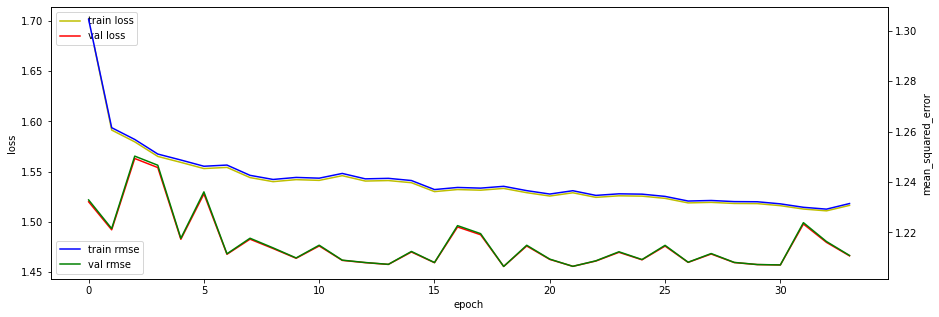

In [107]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(15, 5))

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')   # 훈련데이터의 loss (즉, mse)
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss') # 검증데이터의 loss (즉, mse)

acc_ax.plot(hist.history['root_mean_squared_error'], 'b', label='train rmse')   # 훈련데이터의 mae
acc_ax.plot(hist.history['val_root_mean_squared_error'], 'g', label='val rmse') # 검증데이터의 mae

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('mean_squared_error')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

2022-08-03 15:45:58.480740: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


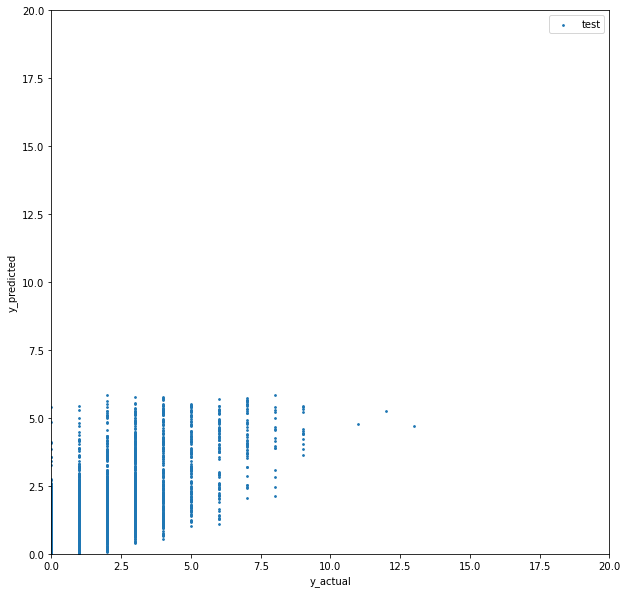

In [105]:
import matplotlib.pyplot as plt

# test data에 대한 예측값
y_pred = model.predict(X_test)

# 그림 가로, 세로 크기
plt.figure(figsize=(10,10))  

#test data의 실제 y값과 예측 y값을 입력 => y=x 그래프와 가까울수록 정확
plt.scatter(y_test, y_pred, label="test", s=3)  
# plt.title('test title')

# X축 이름
plt.xlabel('y_actual')   
# Y축 이름
plt.ylabel('y_predicted')

# 범례표시
plt.legend()

# X축 표시 범위, Y축 표시 범위 
plt.xlim((0,20))  
plt.ylim((0,20))  

plt.show()

In [806]:
hospital2 = hospital[[
'population_tot', 'precipitation_duration_hr', 
    'low_temp', 'high_temp',
#     'avg_temp',
    'o3_ppm', 'season_digit', 
    'avg_wind_speed', 'day_nm_digit', 
    'snow_cover_cm', 
    'avg_age', 
    'region_digit',
    'fat_rate','high_blood_pressure_rate',
    'fine_dust_modified',
        'frequency_tot']]

X_data = hospital2.drop(['frequency_tot'], axis=1)
y_data = hospital2[['frequency_tot']]

In [807]:
X_data

,population_tot,precipitation_duration_hr,low_temp,high_temp,o3_ppm,season_digit,avg_wind_speed,day_nm_digit,snow_cover_cm,avg_age,region_digit,fat_rate,high_blood_pressure_rate,fine_dust_modified
0,1535335,1.154615,-6.607692,1.553846,0.0184,3,2.115385,3,2.200000,40.9,0,27.7,26.3,36.00
1,1535335,0.410000,-9.376923,0.876923,0.0184,3,1.592308,1,2.246154,40.9,0,27.7,26.3,54.25
2,1535335,2.115385,-9.261538,0.692308,0.0184,3,2.038462,5,2.176923,40.9,0,27.7,26.3,73.75
3,1535335,0.269231,-10.307692,-2.400000,0.0184,3,2.484615,6,2.076923,40.9,0,27.7,26.3,62.75
4,1535335,0.000000,-12.638462,-0.515385,0.0184,3,1.853846,4,1.884615,40.9,0,27.7,26.3,75.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17531,1578933,0.000000,-10.440000,5.180000,0.0134,3,0.640000,2,0.000000,40.8,15,27.5,24.9,21.00
17532,1578933,0.000000,-9.420000,2.480000,0.0134,3,0.780000,3,0.000000,40.8,15,27.5,24.9,30.00
17533,1578933,0.000000,-2.720000,5.940000,0.0134,3,1.040000,1,0.000000,40.8,15,27.5,24.9,43.00
17534,1578933,0.000000,-4.340000,7.700000,0.0134,3,2.040000,5,0.000000,40.8,15,27.5,24.9,20.00


In [108]:
X_data

,area_label,mm,weekday,sum_rn,avg_ps,o3,total_pop,elderly_ratio,avg_age,min_max_ps,heat_wave,cold_wave,diff_hum,diff_temp,pm10_7b
0,0,1,6,0.173611,1023.886667,0.027750,762617,18.053361,42.4,6.340000,0,0,65.0,12.3,30.158333
1,1,1,6,0.037736,1024.875000,0.023165,5928150,10.649039,37.7,5.500000,0,0,27.0,7.9,28.537404
2,2,1,6,0.065789,1022.950000,0.027277,1644251,15.076105,40.5,5.200000,0,0,47.0,9.9,26.719907
3,3,1,6,0.721053,1023.268000,0.027274,1342455,19.248690,43.2,5.688000,0,0,70.0,12.0,25.336806
4,4,1,6,0.700000,1025.250000,0.027300,738784,11.037868,37.6,4.100000,0,0,15.0,3.9,18.958333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24832,11,12,3,1.608108,1031.053846,0.035985,955115,24.847060,45.9,6.892308,0,0,65.0,12.3,46.708333
24833,12,12,3,0.967742,1031.300000,0.028738,939456,21.104873,44.2,7.014286,0,0,50.0,10.0,72.548882
24834,13,12,3,0.971429,1030.792308,0.044719,310967,16.470236,41.5,7.523077,0,0,33.0,4.9,56.156250
24835,14,12,3,0.196970,1031.513333,0.024484,1023210,19.459055,43.1,6.800000,0,0,55.0,9.0,79.543252


In [109]:
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X_data)
numpY = np.empty((24837, 1))
for i in range(24837):
    numpY[i] = y_data['frequency'][i]
    
X_train, X_test, y_train, y_test = train_test_split(X_norm, 
                                                    numpY,
                                                   test_size = .2,
                                                    shuffle=True,
                                                   random_state = 1)

In [819]:
# 필요모듈
# from numpy import loadtxt
from tensorflow.python.keras.models import load_model

# 모델 불러오기
loaded_model = load_model("dnn_weather_hospital10.h5")

ValueError: Unknown metric function: R_squared. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

In [835]:
model.summary()

score = model.evaluate(X_test, y_test)
print('test_loss: ', score[0])
print('test_rmse: ', score[1])
# print('test_r2_score: ', score[2])
print('test_adj_r2_score: ', adj_r2_score(y_test, y_pred))

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_172 (Dense)           (None, 64)                960       
                                                                 
 activation_172 (Activation)  (None, 64)               0         
                                                                 
 dense_173 (Dense)           (None, 32)                2080      
                                                                 
 activation_173 (Activation)  (None, 32)               0         
                                                                 
 dense_174 (Dense)           (None, 1)                 33        
                                                                 
 activation_174 (Activation)  (None, 1)                0         
                                                                 
Total params: 3,073
Trainable params: 3,073
Non-train

In [725]:
def R_squared(y, y_pred):
    residual = tf.reduce_sum(tf.square(tf.subtract(y, y_pred)))
    total = tf.reduce_sum(tf.square(tf.subtract(y, tf.reduce_mean(y))))
    r2 = tf.subtract(1.0, tf.divide(residual, total))
    return r2

In [728]:
R_squared(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float64, numpy=0.5864430701340259>

In [808]:
veri_data = pd.read_csv('./test_data.csv', encoding='utf-8')

In [810]:
veri_data.drop('Unnamed: 0', axis=1, inplace=True)
veri_data

,yyyymmdd,area,frequency_m,frequency_f
0,2015-01-01,강원,4,2
1,2015-01-01,경기,4,6
2,2015-01-01,경남,6,1
3,2015-01-01,경북,5,3
4,2015-01-01,광주,2,4
...,...,...,...,...
6200,2015-12-31,전남,0,3
6201,2015-12-31,전북,1,0
6202,2015-12-31,제주,0,0
6203,2015-12-31,충남,0,0


In [811]:
y_test

array([[4.],
       [0.],
       [2.],
       ...,
       [2.],
       [1.],
       [2.]])

In [812]:
veri_data['frequency_tot'] = veri_data['frequency_f'] + veri_data['frequency_m']
veri_data

,yyyymmdd,area,frequency_m,frequency_f,frequency_tot
0,2015-01-01,강원,4,2,6
1,2015-01-01,경기,4,6,10
2,2015-01-01,경남,6,1,7
3,2015-01-01,경북,5,3,8
4,2015-01-01,광주,2,4,6
...,...,...,...,...,...
6200,2015-12-31,전남,0,3,3
6201,2015-12-31,전북,1,0,1
6202,2015-12-31,제주,0,0,0
6203,2015-12-31,충남,0,0,0


In [814]:
veri_test = veri_data['frequency_tot']

In [818]:
y_data

,frequency_tot
0,6
1,2
2,0
3,3
4,3
...,...
17531,2
17532,0
17533,1
17534,1


In [816]:
veri_test

0        6
1       10
2        7
3        8
4        6
        ..
6200     3
6201     1
6202     0
6203     0
6204     1
Name: frequency_tot, Length: 6205, dtype: int64

In [817]:
numpV = np.empty((17536, 1))
for i in range(17536):
    numpV[i] = veri_test[i]

KeyError: 6205

In [580]:
y_data

,frequency_tot
0,6
1,2
2,0
3,3
4,3
...,...
17531,2
17532,0
17533,1
17534,1


In [581]:
X_data

,population_tot,precipitation_duration_hr,low_temp,high_temp,o3_ppm,season_digit,avg_wind_speed,day_nm_digit,snow_cover_cm,avg_age,fat_rate,high_blood_pressure_rate,fine_dust_modified
0,1535335,1.154615,-6.607692,1.553846,0.0184,3,2.115385,3,2.200000,40.9,27.7,26.3,36.00
1,1535335,0.410000,-9.376923,0.876923,0.0184,3,1.592308,1,2.246154,40.9,27.7,26.3,54.25
2,1535335,2.115385,-9.261538,0.692308,0.0184,3,2.038462,5,2.176923,40.9,27.7,26.3,73.75
3,1535335,0.269231,-10.307692,-2.400000,0.0184,3,2.484615,6,2.076923,40.9,27.7,26.3,62.75
4,1535335,0.000000,-12.638462,-0.515385,0.0184,3,1.853846,4,1.884615,40.9,27.7,26.3,75.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17531,1578933,0.000000,-10.440000,5.180000,0.0134,3,0.640000,2,0.000000,40.8,27.5,24.9,21.00
17532,1578933,0.000000,-9.420000,2.480000,0.0134,3,0.780000,3,0.000000,40.8,27.5,24.9,30.00
17533,1578933,0.000000,-2.720000,5.940000,0.0134,3,1.040000,1,0.000000,40.8,27.5,24.9,43.00
17534,1578933,0.000000,-4.340000,7.700000,0.0134,3,2.040000,5,0.000000,40.8,27.5,24.9,20.00


In [633]:
# 한값만 예측

# 정규화된 X 값
y_pred = model.predict(X_norm[[300]])
print('y_pred = ', y_pred)
print('y_test = ', y_test[300])

# 정규화 되지 않은 새로운 X값
X_new = [1535335, 1.154615, -6.607692, 1.553846, 0.0184, 3, 2.115385, 3, 2.200000, 40.9, 27.7, 26.3, 36.00]  
# X를 정규화
X_new_norm = scaler.transform([X_new])   

y_pred = model.predict(np.array(X_new_norm,))
print("y_pred = ", y_pred)
print("y_actual = ", y_test[0])

y_pred =  [[1.3925079]]
y_test =  [3.]
y_pred =  [[1.6688515]]
y_actual =  [4.]


/Users/ichanghun/miniforge3/envs/tens2/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [492]:
# Perform the intial fitting to get the LinearRegression object
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_test, y_test)

mse_sum = 0
for sale, x in zip(y_test, X):
    prediction = lm.predict(x)
    mse_sum += (sale - prediction)**2
mse = mse_sum / len(sales)

print(mse)

NameError: name 'sales' is not defined